<img src="../logoutn.jpg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea Semanal 5

Farcy Facundo


## ÍTEMS 1 - 4 + BONUS DESNORMALIZAR PARA D(W=0) = 200uS

In [1]:
from IPython.display import IFrame
IFrame("TS5.pdf", width=1000, height=1000)


### COMPARACIÓN TRANSFERENCIA NORMALIZADA
Según los cálculos, aplicando un bessel-thompson de grado 2 la transferencia normalizada nos quedó:
\begin{equation}
T(s) = \frac{3}{(s')^2+(s')^1 * 3 +3} 
\end{equation}

Podemos corroborar si es correcto utilizando la función bessel de scipy.signal

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: facu
"""

#-------------------------
# IMPORTACIÓN DE MÓDULOS Y CONFIGURACIONES PREVIAS
#------------------------
# Módulos externos

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13
#_=plt.grid(True, which="both")
mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap, pretty_print_bicuad_omegayq, pretty_print_SOS, plot_plantilla, tf2sos_analog
from pytc2.general import print_latex, a_equal_b_latex_s

import matplotlib.patches as patches
from matplotlib.path import Path


#----------------------
# INICIO DEL CÓDIGO
#--------------------
n=2
att_min= 10
att_max=1
wp=1
ws=2.5
H_B = sig.bessel(n,wp,analog=True, output='sos',norm='delay')

pretty_print_SOS(H_B)

comment='''
_,axes_hdl_1=bodePlot(H_C, fig_id="1", filter_description="|T(S)|")
_, axes_hdl_2=bodePlot(H_C, fig_id="2", filter_description="|T(S)|")
#axes_hdl_2[0].set_xlim(left=5e3, right=2e4)
axes_hdl_2[0].set_ylim(top=1, bottom=-4);
plt.sca(axes_hdl_1[0])
plot_plantilla(filter_type="lowpass", fpass=1.0, ripple=0.5, fstop=3.0, attenuation=16)
plt.sca(axes_hdl_2[0])
plot_plantilla(filter_type="lowpass", fpass=1.0, ripple=1, fstop=3.0, attenuation=16)
'''


<IPython.core.display.Math object>

Habiendo comprobado que el desarrollo de bessel fue correcto, armamos la función transferencia obtenida a partir del circuito Sallen-key, con los valores de componentes normalizados. Deberíamos obtener la misma transferencia.

In [88]:
G1=G2=2.
C1=1.
C2=4/3

w0 = np.sqrt(G1*G2/(C1*C2))
q= w0*C2/(G1+G2)

num = np.array([w0**2])
den = np.array([1., w0/q,w0**2])
T_tf = sig.TransferFunction(num,den)
T = tf2sos_analog(num,den)
pretty_print_SOS(T)

<IPython.core.display.Math object>

Cuyos gráficos son


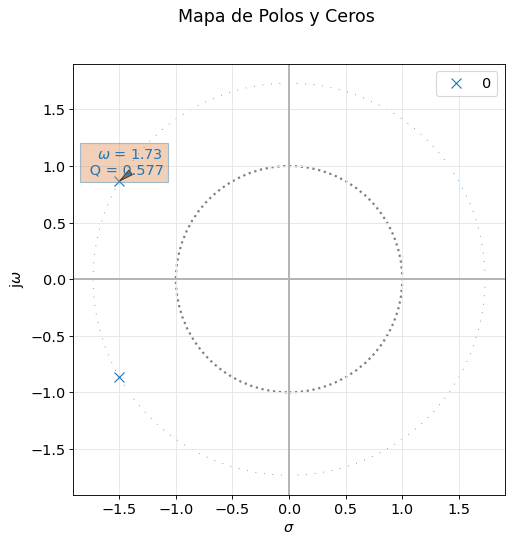

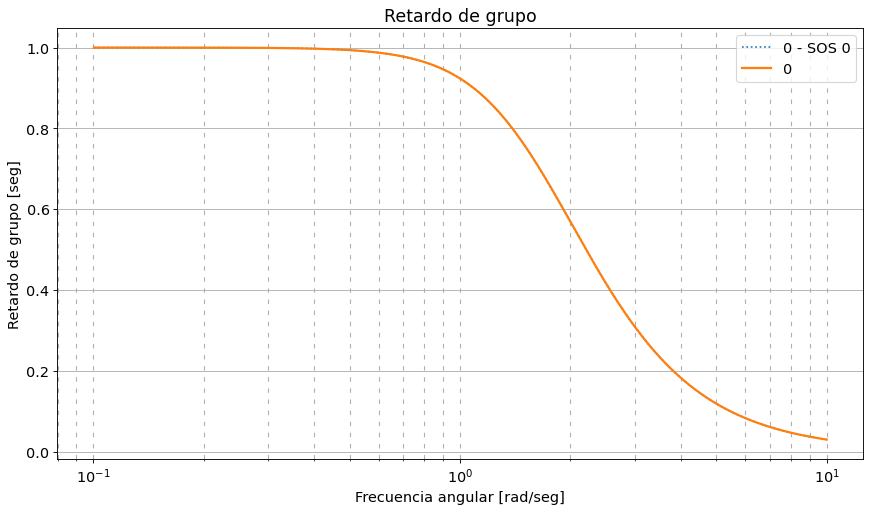

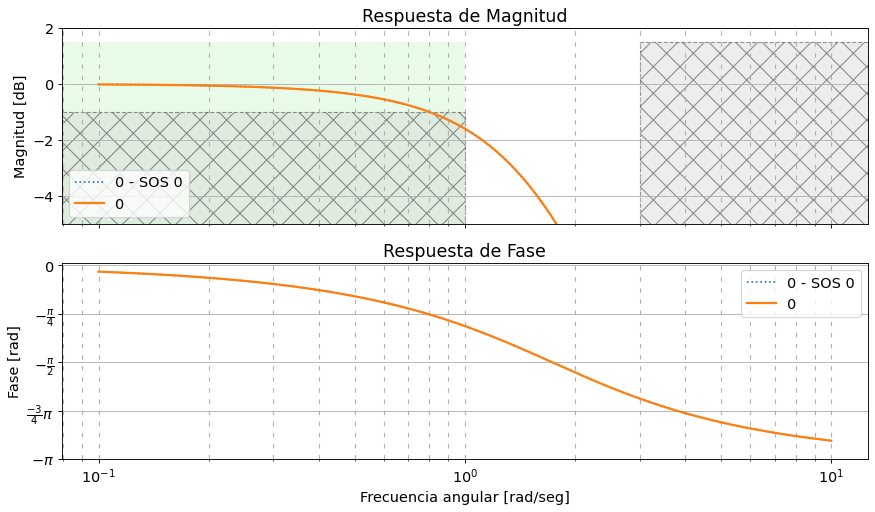

In [114]:
axis_hand=analyze_sys(T)
plt.sca(axis_hand[0][1][0])
plot_plantilla(filter_type="lowpass", fpass=1.0, ripple=1, fstop=3.0, attenuation=16)
axis_hand[0][1][0].set_ylim(top=2, bottom=-5)

#print(axis_hand)
axis_hand[0][1][0].grid(axis='x', which='both', visible=True, linestyle=(0, (4,6)),linewidth=1)
axis_hand[0][1][1].grid(axis='x', which='both', visible=True, linestyle=(0, (4,6)),linewidth=1)
axis_hand[3][1].grid(axis='x', which='both', visible=True, linestyle=(0, (4,6)),linewidth=1)


Efectivamente, se puede observar como eñ retardo de grupo se mantiene en constante, hasta casi 0,4Hz.

NOTA: Puedo notar que según el gráfico, el circuito no cumpliría las normas de requerimientos debido a que para w=1 la attenuación es mayor a 1db. Sin embargo, no pude encontrar dónde me equivoqué en la cuenta.

## SIMULACION


<img src="Spice1.png" display="block" margin=auto width=900>
<img src="Spice2.png" display="block" margin=auto width=900>
<img src="Spice3.png" display="block" margin=auto width=900>
<img src="Spice4.png" display="block" margin=auto width=900>
    